In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [15]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [16]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [18]:
import os 
os.getcwd()
os.chdir('C:/PROJECT/code/Brain_tumor')
print(os.getcwd())

C:\PROJECT\code\Brain_tumor


In [19]:
training_set = train_datagen.flow_from_directory('C:/PROJECT/code/Brain_tumor/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:\PROJECT/code/Brain_tumor/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 22 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [28]:
history=classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
     

Epoch 1/100


C:\Users\chidu\AppData\Local\Temp\ipykernel_16316\2018510864.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)


1/1 [==============================] - 0s 247ms/step - loss: 0.0714 - accuracy: 0.9545 - val_loss: 2.4404 - val_accuracy: 0.4286
Epoch 2/100
1/1 [==============================] - 0s 172ms/step - loss: 0.1202 - accuracy: 0.9545 - val_loss: 2.2799 - val_accuracy: 0.4286
Epoch 3/100
1/1 [==============================] - 0s 153ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 2.1478 - val_accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 192ms/step - loss: 0.0690 - accuracy: 0.9545 - val_loss: 2.0195 - val_accuracy: 0.7143
Epoch 5/100
1/1 [==============================] - 0s 172ms/step - loss: 0.1043 - accuracy: 0.9545 - val_loss: 1.9793 - val_accuracy: 0.7143
Epoch 6/100
1/1 [==============================] - 0s 180ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 1.9750 - val_accuracy: 0.7143
Epoch 7/100
1/1 [==============================] - 0s 146ms/step - loss: 0.0541 - accuracy: 0.9545 - val_loss: 2.0581 - val_accuracy: 0.5714
Epoch 8/100
1/1 [========

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

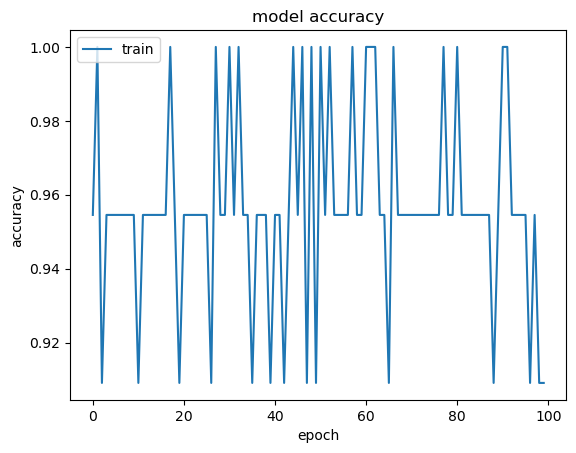

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

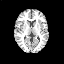

In [ ]:
import numpy as np
import keras.utils as image
test_image = image.load_img("C:/PROJECT/code/TestImages/img1.jpg", target_size = (64, 64))
test_image

In [ ]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[ 0.,  0.,  0.],
         [18., 18., 18.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
        

In [ ]:
result = classifier.predict(test_image)
result

1/1 [==============================] - 0s 262ms/step


array([[0.]], dtype=float32)

In [ ]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [ ]:
if result[0][0] == 0:
    prediction = 'Benign'
else:
    prediction = 'Malignent'
print("Detected tumor type is %s"%prediction)


Detected tumor type is Benign
